In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#import random
import seaborn as sns
from pylab import rcParams
#sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)
import time

Проверка np.randn()

In [47]:
selSize=int(10e5)
a = np.zeros(selSize)
for i in range(a.size):
    a[i] = np.random.randn()
print(a)
a.mean(), a.std()

[ 0.49671415 -0.1382643   0.64768854 ... -0.11297975  1.46914237
  0.47643025]


(-0.0015997564542563718, 1.000188036804731)

<Axes: ylabel='Count'>

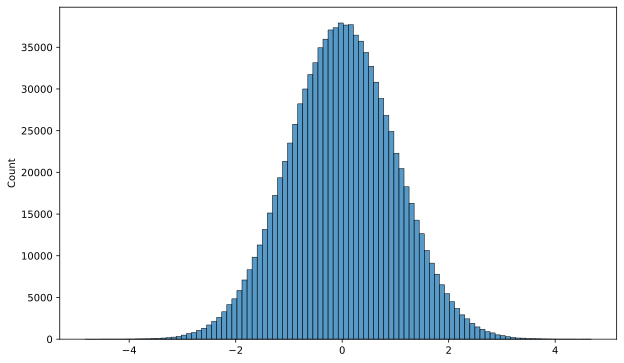

In [48]:
sns.histplot(x=a, bins=100)
#plt.hist(a, color = 'blue', edgecolor = 'black', bins = 0.0001)

Создание собственного генератора

In [49]:
class LinearCongruentialGenerator:
    def __init__(self, seed, a, c, m):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def generate(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state/m

# Параметры генератора (можно изменить)
seed = 42
a = 1664525
c = 1013904223
m = 2**32

rng = LinearCongruentialGenerator(seed, a, c, m)

In [50]:
#Используется преобразование Бокса-Мюллера для того, чтобы из 2-х чисел, распределенных равномерно, получить 2 числа, распределенных нормально
def getNorm():
    u1=rng.generate()
    u2=rng.generate()

    z1 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)

    return z1, z2

In [51]:
#Генерируется 100тыс. чисел, чтобы посмотреть визуально, на что похоже распределение 
selSize=int(10e5)
rand=np.zeros(selSize)
for i in range(0, rand.size, 2):
    rand[i], rand[i+1] = getNorm()

In [52]:
#Среднее и дисперсия как у стандартного нормального распределения
rand.mean(), rand.std()

(0.00026219147772792915, 1.0010360572472685)

<Axes: ylabel='Count'>

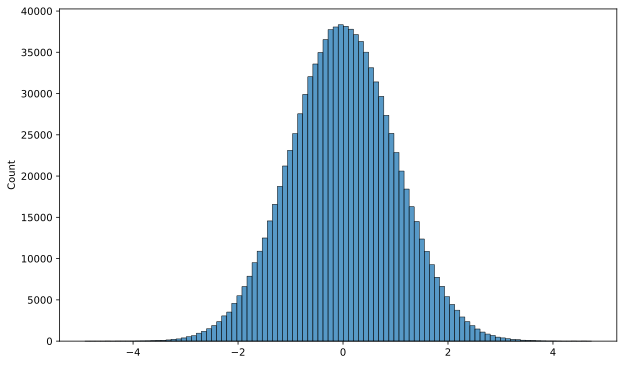

In [53]:
#График тоже похож на стандартное нормальное распределение
sns.histplot(x=rand, bins=100)

In [67]:
#Теперь сгенерируем 10млн чисел, чтобы проверить гипотезу, что распределение имеет стандартное распределение. Используется критерий Пирсона.
#Если будете сами генерировать, то лучше уменьшить размер с 10млн., потому что у меня только на генерацию ушло 15 мин., и через блок, где считается количество, ещё 15 мин.
selSize=int(10e7)
rand=np.zeros(selSize)
for i in range(0, rand.size, 2):
    rand[i], rand[i+1] = getNorm()

In [68]:
#Числовая ось делится на 12 отрезков: больше 4, меньше -4, и 10 равных отрезков между -4 и 4. Число 12 произвольное, его можно менять. 4 и -4 тоже произвольные, взяты потому что за пределами 4 сигм почти нет точек.
n=12
inters=np.linspace(-4,4,n-1)
count=np.zeros(n)
# print(inters)
# print(count)


In [69]:
#Здесь идёт расчет количества значений в каждом интервале.
for x in rand:
    if x<inters[0]:
        count[0]+=1
    if x>inters[-1]:
        count[-1]+=1
    
    for i in range(inters.size-1):
        if (x<inters[i+1]) & (x>inters[i]):
            count[i+1]+=1

# print(inters)
# print(count)

In [70]:
#Для удобства разделил количество на каждом интервале на общее количество, чтобы получить наблюдаемую вероятность
count/=rand.size
# print(count)

In [71]:
from scipy.stats import norm
mean = 0
std_dev = 1

In [72]:
#Здесь идёт расчёт теоретической вероятности попасть в каждый интервал
pred_prob=np.zeros(n)
pred_prob[0]=norm.cdf(inters[0], loc=mean, scale=std_dev)
pred_prob[-1]=1-norm.cdf(inters[-1], loc=mean, scale=std_dev)

# print(pred_prob)
for i in range(inters.size-1):
    pred_prob[i+1]=norm.cdf(inters[i+1], loc=mean, scale=std_dev)-norm.cdf(inters[i], loc=mean, scale=std_dev)

# print(pred_prob)

In [73]:
#Используется формула для вычисления хи-квадрата
temp=(count-pred_prob)**2 / pred_prob
# print(err)
# print(errsqr)
# print(temp)

chi=np.sum(temp) * rand.size
print(chi)


5.922626626405759
